In [136]:
from whisperweranalysis.structure import LJSpeech
from whisperweranalysis.groundtruth import lj_valid
from whisperweranalysis.wer import compute

In [137]:
from whisperweranalysis.mel_utilities import audio2mel

In [138]:
# audio2mel()

In [139]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Natural Speech

In [140]:
GT = LJSpeech.load_from_dir('../whisperweranalysis/LJ_Valid_transcription/NS/0')

In [141]:
compute(lj_valid, GT.transcriptions), GT.compute_wer(lj_valid)

(2.1778584392014517, 2.1778584392014517)

## Vocoded Speech

In [16]:
GT_Mel = LJSpeech.load_from_dir('../whisperweranalysis/LJ_Valid_transcription/GT/GT_MEL')

In [17]:
compute(lj_valid, GT_Mel.transcriptions)

1.9963702359346642

In [18]:
with open('temp_NS.txt', 'w') as f:
    f.writelines([f'{x}\n' for x in GT.transcriptions])
    
with open('temp_NS_Vocoded.txt', 'w') as f:
    f.writelines([f'{x}\n' for x in GT_Mel.transcriptions])
    

## Plotting time

In [142]:
from collections import defaultdict
from pathlib import Path
from whisperweranalysis.checkpoint_mover import get_list_iter

In [143]:
TRANS_DIR = Path('../whisperweranalysis/LJ_Valid_transcription')

In [190]:
all_systems = defaultdict(lambda: defaultdict(int))
for system in TRANS_DIR.glob('*'):
    for iter_ in sorted(list(system.glob('*')), key=lambda x: int(x.name)):
        lj_struct = LJSpeech.load_from_dir(iter_)
        lj_struct.compute_wer(lj_valid)
        all_systems[system.name][int(iter_.name)] = min(100, lj_struct.wer)
        # if int(iter_.name) > 50000:
        #     break
        
all_systems['VOC_500'] = { x: list(all_systems['VOC'].values())[0] for x in all_systems['Tacotron2_500']}

In [191]:
all_systems.keys()

dict_keys(['VOC', 'Tacotron2', 'Tacotron2_500', 'OverFlow', 'OverFlow_500', 'Glow_500', 'Glow', 'NS', 'VOC_500'])

In [200]:

systems = {
    'T2': all_systems['Tacotron2'],
    'GTTS': all_systems['Glow'],
    'OF': all_systems['OverFlow'],
    'VOC': all_systems['VOC'],
}

systems_500 = {
    'T2 (500)': all_systems['Tacotron2_500'],
    'GTTS (500)': all_systems['Glow_500'],
    'OF (500)': all_systems['OverFlow_500'],
    'VOC_500': all_systems['VOC_500']
}

y_values, legend_labels = [], []
for model in systems:
    y_values.append([v for k, v in systems[model].items()])
    legend_labels.append(model)
    
x = sorted(list(get_list_iter()))


y_values_500, legend_labels_500 = [], []
for model in systems_500:
    y_values_500.append([v for k, v in systems_500[model].items()])
    legend_labels_500.append(model)

x_500 = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000]

In [194]:
systems.keys()

dict_keys(['T2', 'GTTS', 'OF', 'VOC'])

In [195]:
print(x)

[0, 500, 1000, 1500, 2000, 2500, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]


/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:191: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim)
/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:192: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim)
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found be

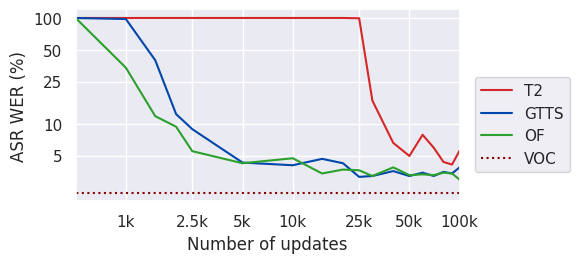

In [196]:
from whisperweranalysis.plotting.line import plot_lines
x_ticks = [0, 1000, 2500, 5000, 10000, 25000, 50000, 100000]
x_tick_labels = ['0', '1k', '2.5k', '5k', '10k', '25k', '50k', '100k']
y_ticks = [5, 10, 25, 50, 100]
y_tick_labels = ['5', '10', '25', '50', '100']
plot_colors = ['#d62728', '#0047AB', '#2ca02c', '#8b0000'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', '-', '-', ':'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'asr_wer.pdf'
plot_log_x = True
plot_log_y = True
xlim = (0, 100000)

plot_lines([x], y_values, 
           x_label='Number of updates',
           y_label='ASR WER (%)', 
           legend_label=legend_labels,
           line_format=line_format,
           plot_colors=plot_colors,
           aspect_ratio=aspect_ratio,
           x_ticks=x_ticks,
           x_tick_labels=x_tick_labels,
           y_ticks=y_ticks,
           y_tick_labels=y_tick_labels,
           file_name=output_filename,
           plot_log_x=plot_log_x,
           plot_log_y=plot_log_y,
           xlim=xlim,
           
)

ValueError: x and y must have same first dimension, but have shapes (16,) and (8,)

findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families w

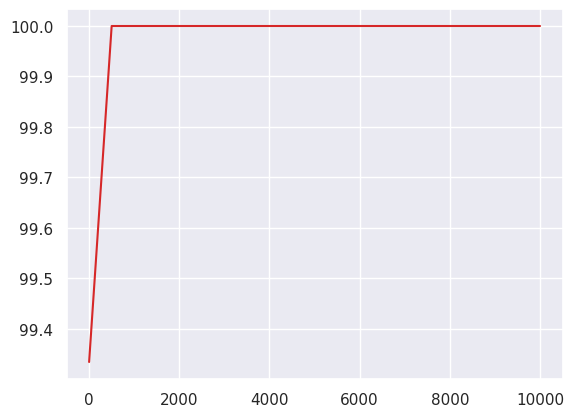

In [201]:
from whisperweranalysis.plotting.line import plot_lines
x_ticks = [0, 1000, 2500, 5000, 8000, 10000]
x_tick_labels = ['0', '1k', '2.5k', '5k', '8k', '10k']
y_ticks = [5, 10, 25, 50, 100]
y_tick_labels = ['5', '10', '25', '50', '100']
plot_colors = ['#d62728', '#0047AB', '#2ca02c', '#8b0000'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', '-', '-', ':'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'asr_wer.pdf'
plot_log_x = True
plot_log_y = True
xlim = (0, 100000)

plot_lines([x_500], y_values_500, 
           x_label='Number of updates',
           y_label='ASR WER (%)', 
           legend_label=legend_labels_500,
           line_format=line_format,
           plot_colors=plot_colors,
           aspect_ratio=aspect_ratio,
           x_ticks=x_ticks,
           x_tick_labels=x_tick_labels,
           y_ticks=y_ticks,
           y_tick_labels=y_tick_labels,
           file_name=output_filename,
           plot_log_x=plot_log_x,
           plot_log_y=plot_log_y,
           xlim=xlim,
           
)